In [118]:
import pandas as pd
import sys
sys.path.insert(1, '../../scripts/')
from s3_support import *
%matplotlib inline

- Percentage increase in total number of donations
- Percentage increase of orgs using Qgiv for their Giving Tuesday fundraising campaigns
- Percentage increase in the number of recurring donations
- The largest donation made was X
- The average donation amount was X
- Top three organization types that received the most support
- Top three organization types that saw the largest increase in support from last Giving - Tuesday

Can you pull what percent of donations made on Giving Tuesday were recurring donations (as in, the first installment was set up on Giving Tuesdsay)?

Pull for (1) all and (2) orgs active 2019 & 2020

In [ ]:
# 10, 14, 16, (following day) 3 @ 8AM for final numbers
hour = 

In [114]:
# giving tuesday date filters
gt_2019 = ["date>='2019-12-03 00:00:00'", "date<'2019-12-04 03:00:00'"]
gt_2020 = ["date>='2020-12-01 00:00:00'", "date<'2020-12-02 03:00:00'"]

gt_2019 = ["date>='2019-12-03 00:00:00'", "date<'2019-12-03 {}:00:00'".format(hour)]
gt_2020 = ["date>='2020-12-01 00:00:00'", "date<'2020-12-01 {}:00:00'".format(hour)]
gt_2021 = ["date<='2022-11-30 00:00:00'", "date<='2022-11-30 {}:00:00'".format(hour)]
gt_2022 = ["date<='2022-11-29 00:00:00'", "date<='2022-11-29 {}:00:00'".format(hour)]

In [115]:
q = "select org, amount, date, hour, recurring, creatingtransactionfor from transactions where status='A' and {}"
trans_2019 = redshift_query_read(q.format(" and ".join(gt_2019)))
trans_2019['year'] = 2019
trans_2020 = redshift_query_read(q.format(" and ".join(gt_2020)))
trans_2020['year'] = 2020

In [76]:
# isolate orgs active in 2019 & 2020
orgs_2019 = trans_2019['org'].unique().tolist()
orgs_2020 = trans_2020['org'].unique().tolist()
orgs_2019_n_2020 = list(set(orgs_2019) & set(orgs_2020))

In [77]:
# counts & sums
len_2019 = len(trans_2019)
sum_2019 = trans_2019['amount'].sum()
len_2020 = len(trans_2020)
sum_2020 = trans_2020['amount'].sum()

print("All organizations:")
print("2019: {} count, ${:,.2f} sum".format(len_2019, sum_2019))
print("2020: {} count, ${:,.2f} sum".format(len_2020, sum_2020))
perc_diff_len = ((len_2020 - len_2019) / len_2019) * 100.
perc_diff_vol = ((sum_2020 - sum_2019) / sum_2019) * 100.
print("Perc difference: {:.1f}% count difference, {:.1f}% sum difference".format(perc_diff_len, perc_diff_vol))

len_2019_i = len(trans_2019[trans_2019['org'].isin(orgs_2019_n_2020)])
sum_2019_i = trans_2019[trans_2019['org'].isin(orgs_2019_n_2020)]['amount'].sum()
len_2020_i = len(trans_2020[trans_2020['org'].isin(orgs_2019_n_2020)])
sum_2020_i = trans_2020[trans_2020['org'].isin(orgs_2019_n_2020)]['amount'].sum()

print()
print("Organizations active 2019 & 2020:")
print("2019: {} count, ${:,.2f} sum".format(len_2019_i, sum_2019_i))
print("2020: {} count, ${:,.2f} sum".format(len_2020_i, sum_2020_i))
perc_diff_len_i = ((len_2020_i - len_2019_i) / len_2019_i) * 100.
perc_diff_vol_i = ((sum_2020_i - sum_2019_i) / sum_2019_i) * 100.
print("Perc difference: {:.1f}% count difference, {:.1f}% sum difference".format(perc_diff_len_i, perc_diff_vol_i))

All organizations:
2019: 25639 count, $3,862,773.63 sum
2020: 41127 count, $6,403,379.79 sum
Perc difference: 60.4% count difference, 65.8% sum difference

Organizations active 2019 & 2020:
2019: 23720 count, $3,573,951.43 sum
2020: 31845 count, $5,086,358.63 sum
Perc difference: 34.3% count difference, 42.3% sum difference


In [78]:
# distinct orgs
perc_diff = ((len(orgs_2020) - len(orgs_2019)) / len(orgs_2019)) * 100.
print("Orgs active 2019: {}".format(len(orgs_2019)))
print("Orgs active 2020: {}".format(len(orgs_2020)))
print("Perc difference: {:.1f}%".format(perc_diff))
print("Orgs active both 2019 & 2020: {}".format(len(orgs_2019_n_2020)))

Orgs active 2019: 1478
Orgs active 2020: 1701
Perc difference: 15.1%
Orgs active both 2019 & 2020: 1095


In [79]:
# recurring
rec_2019 = len(trans_2019[trans_2019['recurring']!=0])
perc_rec_2019 = (rec_2019 / len(trans_2019)) * 100.
rec_2020 = len(trans_2020[trans_2020['recurring']!=0])
perc_rec_2020 = (rec_2020 / len(trans_2020)) * 100.
perc_diff = ((rec_2020 - rec_2019) / rec_2019) * 100.

print("All organizations:")
print("2019 recurring: {} ({:.1f}%)".format(rec_2019, perc_rec_2019))
print("2020 recurring: {} ({:.1f}%)".format(rec_2020, perc_rec_2020))
print("Perc difference: {:.1f}%".format(perc_diff))

trans_2019_i = trans_2019[trans_2019['org'].isin(orgs_2019_n_2020)]
trans_2020_i = trans_2020[trans_2020['org'].isin(orgs_2019_n_2020)]

rec_2019_i = len(trans_2019_i[trans_2019_i['recurring']!=0])
perc_rec_2019_i = (rec_2019_i / len(trans_2019_i)) * 100.
rec_2020_i = len(trans_2020_i[trans_2020_i['recurring']!=0])
perc_rec_2020_i = (rec_2020_i / len(trans_2020_i)) * 100.
perc_diff_i = ((rec_2020_i - rec_2019_i) / rec_2019_i) * 100.

print()
print("Organizations active 2019 & 2020:")
print("2019 recurring: {} ({:.1f}%)".format(rec_2019_i, perc_rec_2019_i))
print("2020 recurring: {} ({:.1f}%)".format(rec_2020_i, perc_rec_2020_i))
print("Perc difference: {:.1f}%".format(perc_diff_i))

All organizations:
2019 recurring: 3554 (13.9%)
2020 recurring: 6329 (15.4%)
Perc difference: 78.1%

Organizations active 2019 & 2020:
2019 recurring: 3328 (14.0%)
2020 recurring: 5458 (17.1%)
Perc difference: 64.0%


In [80]:
# max, mean, median
max_2019 = trans_2019['amount'].max()
mean_2019 = trans_2019['amount'].mean()
median_2019 = trans_2019['amount'].median()

max_2020 = trans_2020['amount'].max()
mean_2020 = trans_2020['amount'].mean()
median_2020 = trans_2020['amount'].median()

print("All organizations:")
print("2019:")
print("\tmax: ${:,.2f}".format(max_2019))
print("\tmean: ${:,.2f}".format(mean_2019))
print("\tmedian: ${:,.2f}".format(median_2019))
print("2020:")
print("\tmax: ${:,.2f}".format(max_2020))
print("\tmean: ${:,.2f}".format(mean_2020))
print("\tmedian: ${:,.2f}".format(median_2020))

trans_2019_i = trans_2019[trans_2019['org'].isin(orgs_2019_n_2020)]
trans_2020_i = trans_2020[trans_2020['org'].isin(orgs_2019_n_2020)]

max_2019_i = trans_2019_i['amount'].max()
mean_2019_i = trans_2019_i['amount'].mean()
median_2019_i = trans_2019_i['amount'].median()

max_2020_i = trans_2020_i['amount'].max()
mean_2020_i = trans_2020_i['amount'].mean()
median_2020_i = trans_2020_i['amount'].median()

print()
print("Organizations active 2019 & 2020:")
print("2019:")
print("\tmax: ${:,.2f}".format(max_2019_i))
print("\tmean: ${:,.2f}".format(mean_2019_i))
print("\tmedian: ${:,.2f}".format(median_2019_i))
print("2020:")
print("\tmax: ${:,.2f}".format(max_2020_i))
print("\tmean: ${:,.2f}".format(mean_2020_i))
print("\tmedian: ${:,.2f}".format(median_2020_i))

All organizations:
2019:
	max: $50,000.00
	mean: $150.66
	median: $50.00
2020:
	max: $100,000.00
	mean: $155.70
	median: $51.97

Organizations active 2019 & 2020:
2019:
	max: $50,000.00
	mean: $150.67
	median: $50.00
2020:
	max: $100,000.00
	mean: $159.72
	median: $51.97


# segments

In [81]:
# org aggregates for org types
org_agg_2019 = trans_2019.groupby('org')['amount'].sum().reset_index()
org_agg_2020 = trans_2020.groupby('org')['amount'].sum().reset_index()
orgs = get_dataframe_from_file("qgiv-stats-data", "organizations.names.csv")[['id', 'segment']]

def get_segment(org):
    if len(orgs[orgs['id']==org]) > 0:
        return orgs[orgs['id']==org]['segment'].iloc[0]
    else:
        return None
    
org_agg_2019['segment'] = org_agg_2019['org'].apply(get_segment)
org_agg_2020['segment'] = org_agg_2020['org'].apply(get_segment)

In [82]:
seg_2019 = org_agg_2019.groupby('segment')['amount'].sum().reset_index()
seg_2020 = org_agg_2020.groupby('segment')['amount'].sum().reset_index()

seg_2019.columns = ['segment', '2019']
seg_2020.columns = ['segment', '2020']
segments = seg_2019.merge(seg_2020, on='segment')
segments['perc_diff'] = (segments['2020'] - segments['2019']) / segments['2019']

In [97]:
top_vol = segments.sort_values('2019', ascending=False).head(3)
top_vol['2019'] = top_vol['2019'].apply(lambda x: "${:,.2f}".format(x))
top_vol['2020'] = top_vol['2020'].apply(lambda x: "${:,.2f}".format(x))
top_vol['perc_diff'] = top_vol['perc_diff'].apply(lambda x: "{:.1f}%".format(x * 100.))

In [99]:
print("Top 3 by volume (2019)")
print("| " + " | ".join(top_vol.columns) + " |")
print("|" + "".join(["---|" for c in top_vol.columns]) + "---|")
for _, r in top_vol.iterrows():
    print("| {} | {} | {} | {} |".format(r['segment'], r['2019'], r['2020'], r['perc_diff']))

Top 3 by volume (2019)
| segment | 2019 | 2020 | perc_diff |
|---|---|---|---|---|
| P - Human Services  | $709,535.59 | $1,547,367.71 | 118.1% |
| B - Educational Institutions  | $588,564.81 | $551,596.44 | -6.3% |
| X - Religion, Spiritual Development  | $319,822.21 | $450,320.86 | 40.8% |


In [100]:
top_vol = segments.sort_values('2020', ascending=False).head(3)
top_vol['2019'] = top_vol['2019'].apply(lambda x: "${:,.2f}".format(x))
top_vol['2020'] = top_vol['2020'].apply(lambda x: "${:,.2f}".format(x))
top_vol['perc_diff'] = top_vol['perc_diff'].apply(lambda x: "{:.1f}%".format(x * 100.))

In [101]:
print("Top 3 by volume (2020)")
print("| " + " | ".join(top_vol.columns) + " |")
print("|" + "".join(["---|" for c in top_vol.columns]) + "---|")
for _, r in top_vol.iterrows():
    print("| {} | {} | {} | {} |".format(r['segment'], r['2019'], r['2020'], r['perc_diff']))

Top 3 by volume (2020)
| segment | 2019 | 2020 | perc_diff |
|---|---|---|---|---|
| P - Human Services  | $709,535.59 | $1,547,367.71 | 118.1% |
| K - Agriculture, Food, Nutrition | $204,814.90 | $915,820.82 | 347.1% |
| B - Educational Institutions  | $588,564.81 | $551,596.44 | -6.3% |


In [103]:
top_perc = segments.sort_values("perc_diff", ascending=False).head(3)
top_perc['2019'] = top_perc['2019'].apply(lambda x: "${:,.2f}".format(x))
top_perc['2020'] = top_perc['2020'].apply(lambda x: "${:,.2f}".format(x))
top_perc['perc_diff'] = top_perc['perc_diff'].apply(lambda x: "{:.1f}%".format(x * 100.))

In [104]:
print("Top 3 by percentage difference")
print("| " + " | ".join(top_perc.columns) + " |")
print("|" + "".join(["---|" for c in top_perc.columns]) + "---|")
for _, r in top_perc.iterrows():
    print("| {} | {} | {} | {} |".format(r['segment'], r['2019'], r['2020'], r['perc_diff']))

Top 3 by percentage difference
| segment | 2019 | 2020 | perc_diff |
|---|---|---|---|---|
| K - Agriculture, Food, Nutrition | $204,814.90 | $915,820.82 | 347.1% |
| H - Medical Research  | $66,124.91 | $172,178.51 | 160.4% |
| P - Human Services  | $709,535.59 | $1,547,367.71 | 118.1% |


# hourly volume

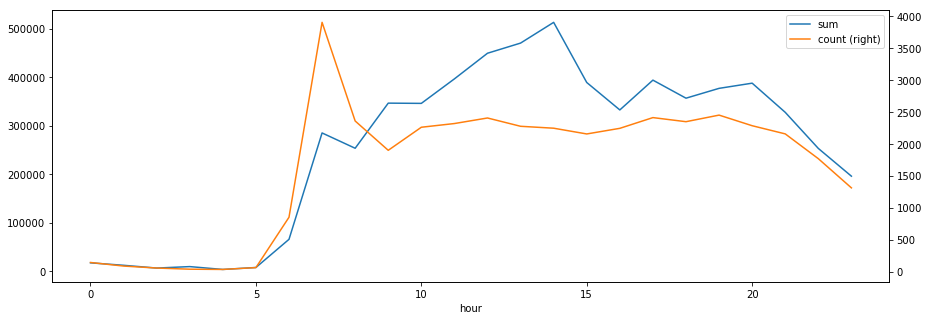

In [119]:
hourly = trans_2020.groupby(['date', 'hour'])['amount'].agg({'count', 'sum'}).reset_index()
hourly.plot(x='hour', y=['sum', 'count'], secondary_y='count', figsize=(15,5))

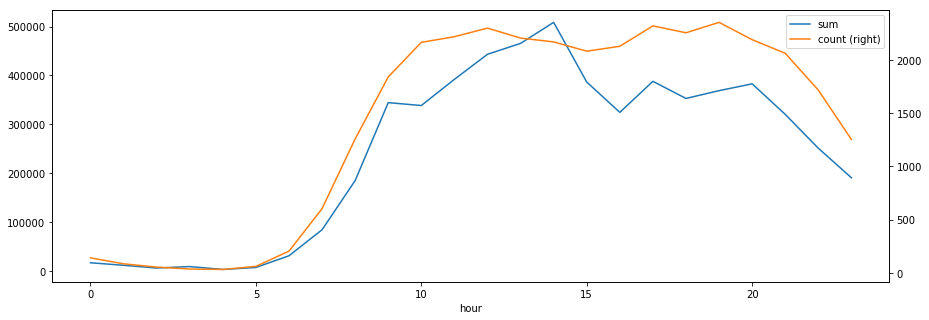

In [120]:
hourly = trans_2020[trans_2020['recurring']==0].groupby(['date', 'hour'])['amount'].agg({'count', 'sum'}).reset_index()
hourly.plot(x='hour', y=['sum', 'count'], secondary_y='count', figsize=(15,5))

In [121]:
hourly

,date,hour,sum,count
0,2020-12-01,0,16848.48,141
1,2020-12-01,1,11711.85,85
2,2020-12-01,2,6046.16,54
3,2020-12-01,3,9096.86,36
4,2020-12-01,4,3206.83,32
5,2020-12-01,5,7238.42,61
6,2020-12-01,6,31200.20,204
7,2020-12-01,7,84452.16,604
8,2020-12-01,8,185026.60,1259
9,2020-12-01,9,344408.88,1842
